<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/4_3_CNN_%E1%84%8B%E1%85%B5%E1%84%86%E1%85%B5%E1%84%8C%E1%85%B5_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_part2_%EA%B3%B5%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 소개



Fashion MNIST는 다양한 **패션 아이템 이미지**가 포함된 데이터셋입니다.

### 데이터셋 특징

- **학습 데이터**: 6만 개
- **테스트 데이터**: 1만 개
- **이미지 크기**: 28×28 (그레이스케일)
- **클래스**: 총 10개 (각 클래스에 데이터 균등 분포)

### 클래스 정보

0번부터 9번까지 다음과 같은 패션 아이템으로 구성됩니다:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


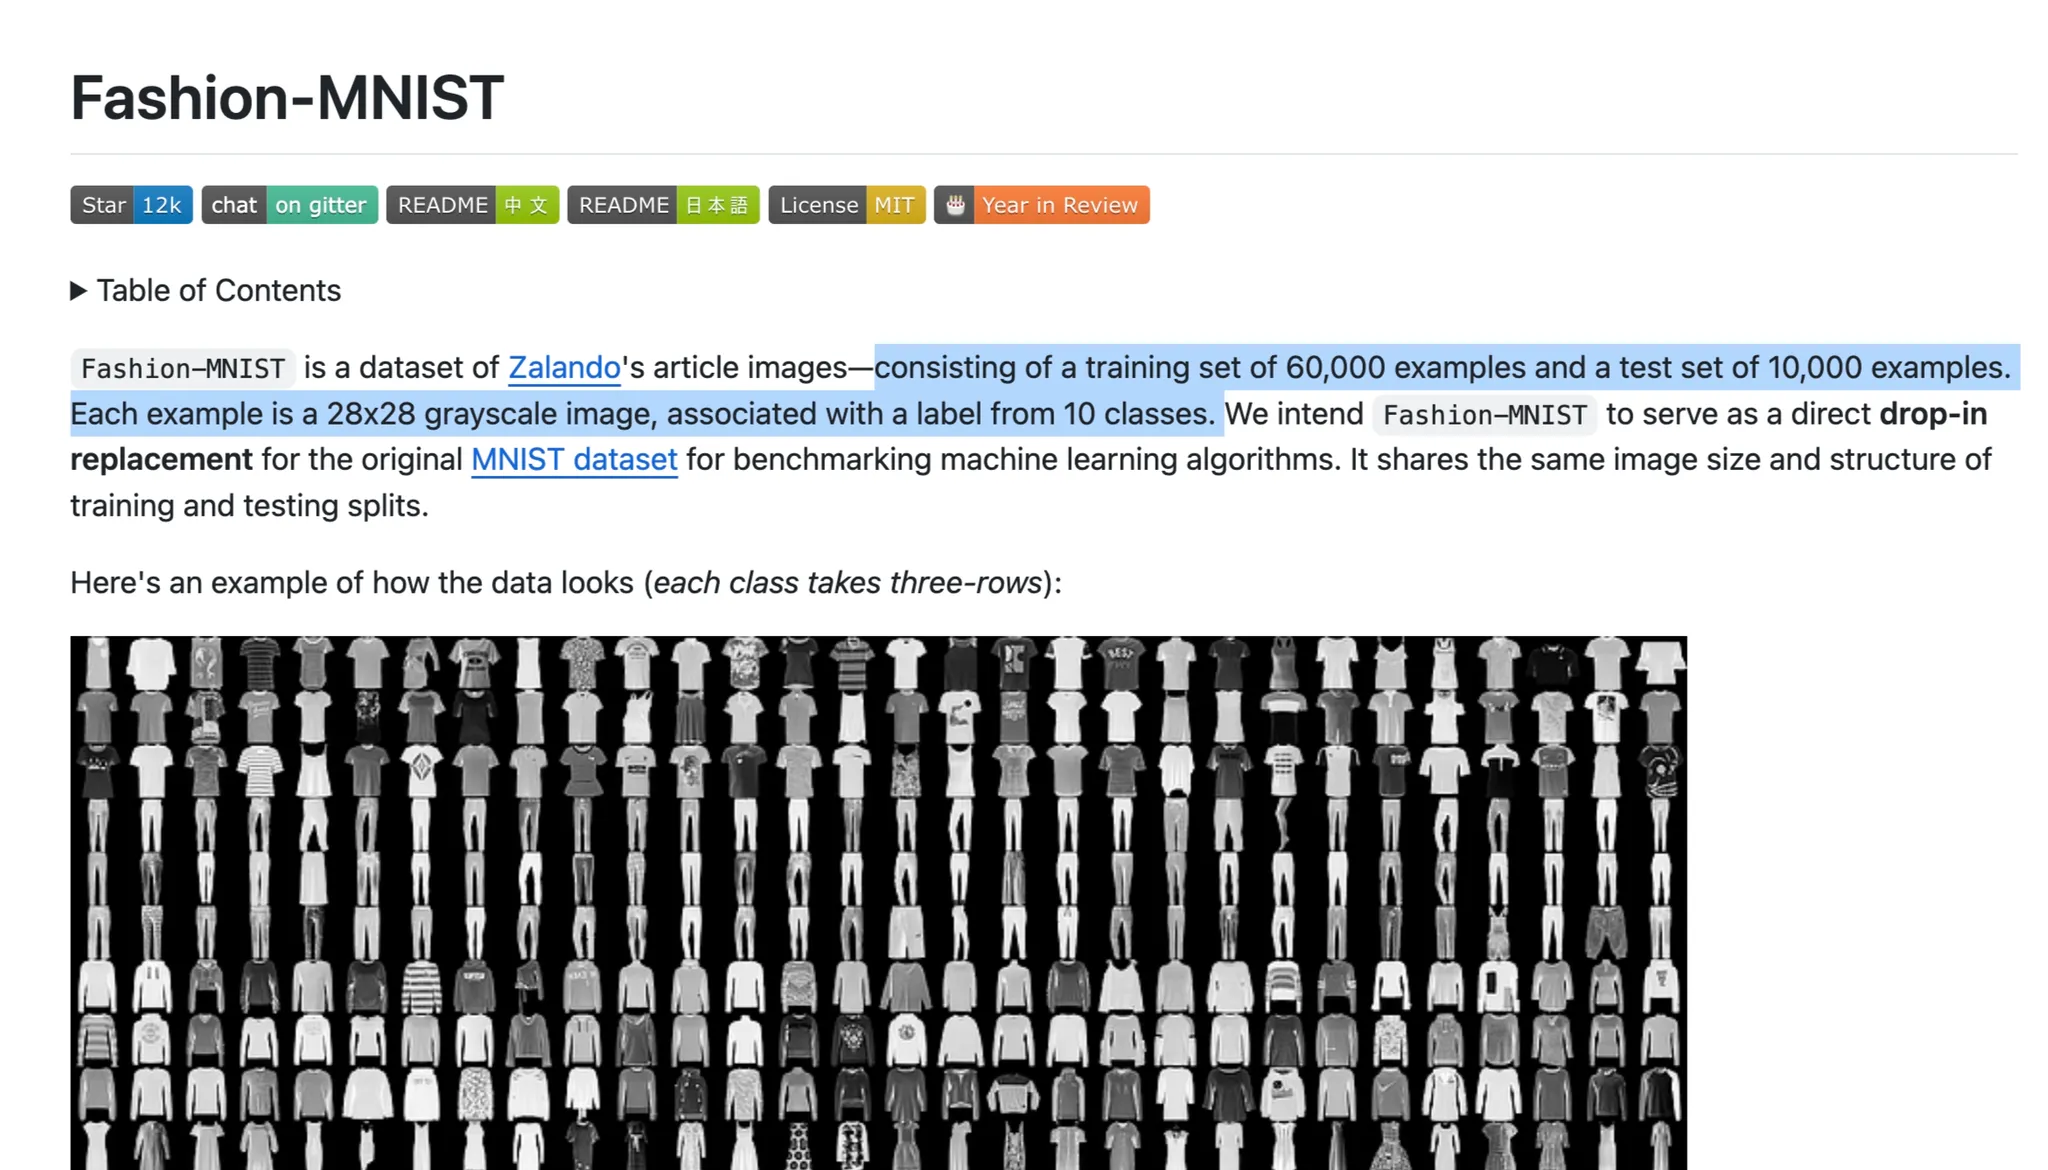

### 데이터 불러오기

PyTorch의 TorchVision 라이브러리

- **TorchVision**은 PyTorch에서 제공하는 **컴퓨터 비전용 라이브러리**입니다.
- 다양한 데이터셋, 모델, 이미지 전처리 및 증강 기능을 지원합니다.
- 이번 강의에서는 TorchVision의 **datasets** 모듈을 활용합니다.

In [ ]:
# 라이브러리 임포트
import numpy as np

import torch
from torchvision import datasets

In [ ]:
# 학습 데이터셋 생성
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
)


In [ ]:
# 테스트 데이터 셋 생성
test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
)


In [ ]:
# 결과 확인
print(f'학습 데이터 개수: {len(train_dataset)}')
print(f'테스트 데이터 개수: {len(test_dataset)}')

학습 데이터 개수: 60000
테스트 데이터 개수: 10000


### 데이터 구조

In [ ]:
data_item = train_dataset[0]
print(data_item)

(<PIL.Image.Image image mode=L size=28x28 at 0x7A872F314410>, 9)


- 각 데이터는 **튜플** 형태:
    1. **이미지 데이터** (PIL.Image 객체)
    2. **레이블** (정수 값)

In [ ]:
# 시각화
import matplotlib.pyplot as plt

def visualize_data(image, label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    plt.show()


- **입력값**: 이미지 데이터(`image`), 클래스 레이블(`label`).
- **출력값**: 이미지를 그레이스케일로 시각화하며, 클래스 이름 표시.

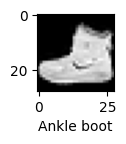

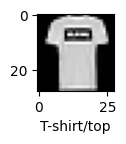

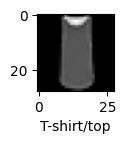

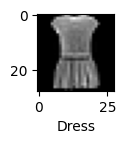

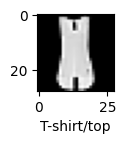

In [ ]:
for i in range(5):
    image = train_dataset[i][0]
    label = train_dataset[i][1]
    visualize_data(image, label)

## 이미지 데이터 전처리하기

Fashion MNIST 데이터셋을 대상으로 전처리 과정을 진행하며, 텐서 변환, 스케일링, 표준화, 그리고 전처리를 데이터셋에 적용하는 방법을 살펴봅니다.

Fashion MNIST 데이터를 불러오면 이미지가 **Pillow(PIL)** 형식으로 제공됩니다.

하지만 PyTorch에서는 **텐서(Tensor)**를 사용해야 하므로, PIL 이미지를 텐서로 변환해야 합니다.

In [ ]:
# 이미지 확인
image_pil = train_dataset[0][0]  # 첫 번째 이미지
type(image_pil)  # <class 'PIL.Image.Image'>

PIL.Image.Image

### 텐서변환

In [ ]:
# PIL image -> Tensor
from torchvision.transforms import v2

to_image = v2.ToImage()
image_tensor = to_image(image_pil)

image_tensor

Image([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
display(image_tensor)

- **결과 타입**: `torchvision.tv_tensors._image.Image`
- **크기**: 텐서의 첫 번째 차원은 채널 수(1, 그레이스케일).
- 변환 후에도 픽셀값은 0~255

### 데이터 타입 변환 및 스케일링

딥러닝 모델 학습을 위해 픽셀값을 **0~1 범위의 실수(float)**로 변환해야 합니다.

In [ ]:
# ToDtype
to_dtype = v2.ToDtype(dtype=torch.float32, scale=True)
image_tensor_float = to_dtype(image_tensor)


- **`dtype`**: 텐서의 데이터 타입(예: `torch.float32`).
- **`scale=True`**: 픽셀값을 0~1로 스케일링.

In [ ]:
print(f'dtype: {image_tensor_float.dtype}')  # torch.float32
print(f'max: {image_tensor_float.max()}')  # 1.0
print(f'min: {image_tensor_float.min()}')  # 0.0

dtype: torch.float32
max: 1.0
min: 0.0


### 여러 전처리 묶기 : `Compose`

In [ ]:
transforms = v2.Compose(
    [
        v2.ToImage(),  # PIL → 텐서 변환
        v2.ToDtype(dtype=torch.float32, scale=True),  # 타입 변환 및 스케일링
    ]
)


In [ ]:
# compose 적용
image_tensor_compose = transforms(image_pil)

# 결과 확인
print(f'type: {type(image_tensor_compose)}')  # torchvision.tv_tensors._image.Image
print(f'dtype: {image_tensor_compose.dtype}')  # torch.float32
print(f'max: {image_tensor_compose.max()}')  # 1.0
print(f'min: {image_tensor_compose.min()}')  # 0.0

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


### 데이터셋 생성 시 전처리 적용

Fashion MNIST 데이터셋을 생성할 때, 전처리(transform)를 바로 적용할 수 있습니다.

In [ ]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms,
)


In [ ]:
image_transformed = train_dataset[0][0]

print(f'type: {type(image_transformed)}')  # torchvision.tv_tensors._image.Image
print(f'dtype: {image_transformed.dtype}')  # torch.float32
print(f'max: {image_transformed.max()}')  # 표준화된 값
print(f'min: {image_transformed.min()}')


type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


## 이미지 데이터 증강하기

데이터 증강은 학습 데이터를 변형하여 데이터 다양성을 높이고, 오버피팅 방지 및 모델 일반화 성능 향상을 목표로 합니다.

### 데이터 증강이란?

- 기존 학습 데이터를 변형하여 **데이터 양을 효과적으로 늘리는 방법**입니다.
- 이미지 데이터의 경우, 이미지 반전, 회전, 자르기, 밝기 조정 등 다양한 방식으로 증강할 수 있습니다.

### 데이터 증강의 효과

- 학습 데이터 다양성을 높여 **오버피팅 방지**.
- 모델의 **일반화 성능** 향상.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2

In [ ]:
# flower 데이터 다운로드
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf ./flower_photos.tgz > /dev/null 2>&1

--2025-02-05 01:33:31--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  42.0MB/s    in 5.8s    

2025-02-05 01:33:37 (37.5 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



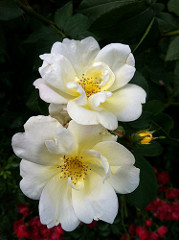

In [ ]:
image_flower = Image.open('/content/flower_photos/roses/10090824183_d02c613f10_m.jpg')
image_flower


In [ ]:
# 시각화 함수 정의
def visualize(input_image, transform):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes = axes.flatten()
    for ax in axes:
        ax.imshow(transform(input_image))
        ax.axis('off')

    plt.show()

#### 주요 이미지 증강 기법

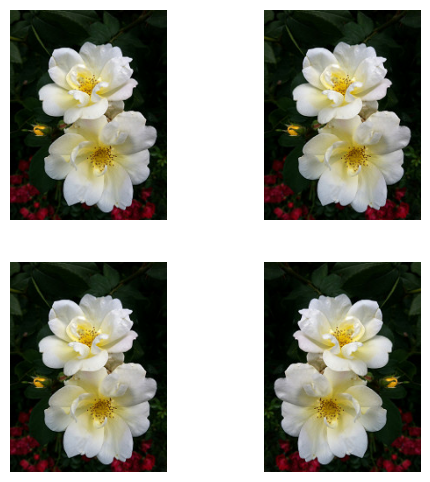

In [ ]:
# 이미지 좌우 반전 (반전이 일어날 확률 p)
hor_flip = v2.RandomHorizontalFlip(p=0.5)
visualize(image_flower, hor_flip)
# hor_flip(image_flower)


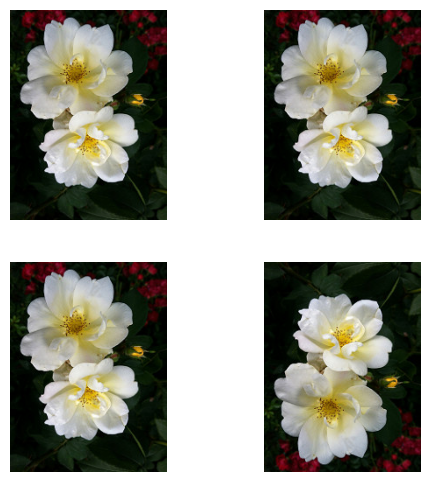

In [ ]:
# RandomVerticalFlip (이미지 상하 반전, 반전이 일어날 확률 p)
# 주의 : 상하반전은 자연스러운 이미지가 아닐 수 있으므로 잘 사용하지 않습니다.

ver_flip = v2.RandomVerticalFlip(p=0.5)
visualize(image_flower, ver_flip)

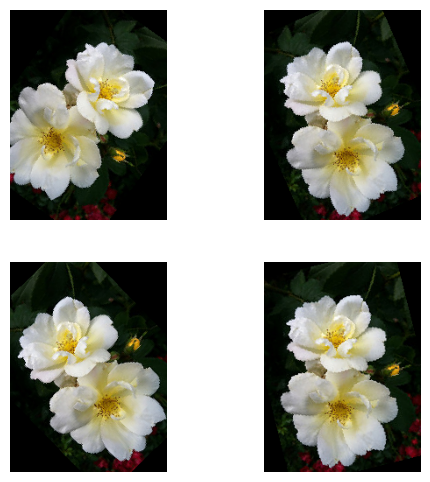

In [ ]:
# random rotation : 이미지를 시계 /반시계 방향으로 회전
# degree : 최대 회전 각도
rot = v2.RandomRotation(degrees=45)
visualize(image_flower, rot)

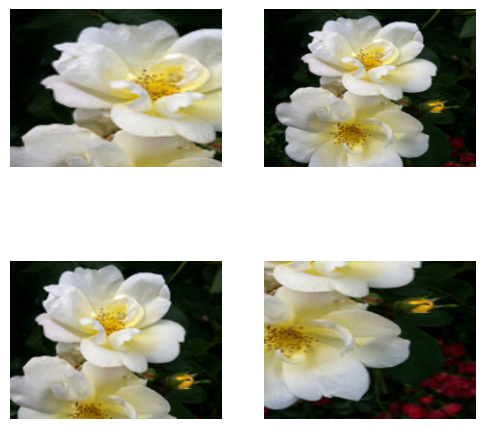

In [ ]:
# randomresizedcrop(이미지를 랜덤하게 자르고 리사이즈)
# size: 잘린 이미지를 리사이즈할 크기.
rrc = v2.RandomResizedCrop(size=image_flower.size)
visualize(image_flower, rrc)

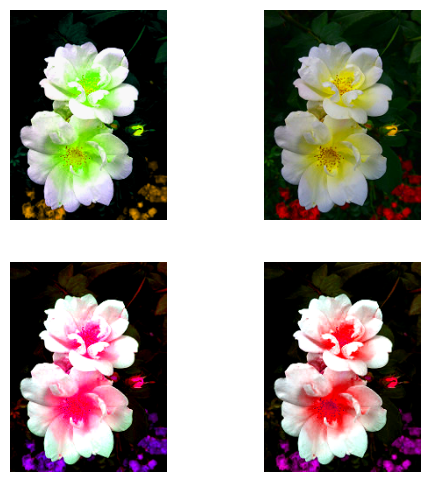

In [ ]:
# color jitter
jitter = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=2, hue=0.2)
visualize(image_flower, jitter)


- 이미지를 **색상, 밝기, 채도, 대비** 측면에서 변형.
    - `brightness`: 밝기 조정.
    - `contrast`: 대비 조정.
    - `saturation`: 채도 조정.
    - `hue`: 색상 조정.

#### Compose
TorchVision의 Compose 객체를 활용해 여러 전처리 및 증강 기법을 결합할 수 있습니다.

In [ ]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),  # PIL → Tensor
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),  # 0~1로 스케일링
        v2.Normalize(mean=[0.286], std=[0.353]),  # 표준화
    ]
)


In [ ]:
transforms_test = v2.Compose(
    [
        v2.ToImage(),  # PIL → Tensor
        v2.ToDtype(dtype=torch.float32, scale=True),  # 0~1로 스케일링
        v2.Normalize(mean=[0.286], std=[0.353]),  # 표준화
    ]
)


In [ ]:
from torchvision import datasets

train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test,
)


#### 주의사항

- **학습 데이터**: 증강 및 전처리 적용.
- **테스트 데이터**: 증강 없이 전처리만 적용.

##  CNN 모델에 사용되는 레이어

### `Conv2d`

##### 기본 설정

```python
conv_layer = nn.Conv2d(
    in_channels=3,  # 입력 채널 수 (예: RGB 이미지면 3)
    out_channels=32,  # 출력 채널 수 (필터 개수)
    kernel_size=3,  # 커널 크기 (3x3 필터)
    stride=1,  # 필터 이동 간격
    padding=0,  # 입력 가장자리 패딩 크기
)

```

##### 주요 파라미터

- **`in_channels`**: 입력 데이터의 채널 수.
- **`out_channels`**: 출력 데이터의 채널 수 = 필터 개수.
- **`kernel_size`**: 필터 크기. (정수 → 정사각형, 튜플 → 직사각형 가능)
- **`stride`**: 필터 이동 간격. (기본값: 1)
- **`padding`**: 입력 가장자리를 채워 크기를 조정.
    - 0: 패딩 없음 (`valid`),
    - 1: 출력 크기 = 입력 크기 (`same`은 스트라이드 1에서만 적용 가능).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

conv_layer = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

In [ ]:
# 입력 데이터 생성
x = torch.randn(2, 3, 28, 28)  # 배치 크기: 2, 채널: 3, 크기: 28x28
y = conv_layer(x)

print(y.size())

torch.Size([2, 32, 28, 28])


##### 출력 형태

- 배치 크기: 동일 (2)
- 채널 수: `out_channels` (32)
- 높이와 너비: 필터 크기, 패딩, 스트라이드에 따라 변화.

### Pooling Layer

풀링 레이어는 데이터를 **다운샘플링**하여 크기를 줄이고, 중요한 정보를 추출합니다.

주요 방식:

- **맥스 풀링(Max Pooling)**: 윈도우 내 최댓값 선택.
- **애버리지 풀링(Average Pooling)**: 윈도우 내 평균값 선택.

##### 1) `MaxPool2d` 클래스를 이용한 맥스 풀링 레이어 생성

##### 기본 설정

```python
maxpool_layer = nn.MaxPool2d(
    kernel_size=2,  # 풀링 윈도우 크기 (2x2)
    stride=2,  # 이동 간격 (기본값: 커널 크기)
    padding=0,  # 패딩 크기
)

```

##### 주요 파라미터

- **`kernel_size`**: 풀링 윈도우 크기.
- **`stride`**: 윈도우 이동 간격.
- **`padding`**: 가장자리 패딩 크기.

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)


In [ ]:
x = torch.randn(2, 3, 28, 28)
y = maxpool_layer(x)
print(y.size())  # torch.Size([2, 3, 14, 14])

torch.Size([2, 3, 14, 14])


- 배치 크기와 채널 수: 동일.
- 높이와 너비: `kernel_size`와 `stride`에 따라 축소.

풀링 레이어는 파라미터가 필요하지 않기 때문에, torch.nn.functional API를 직접 사용하는 것도 가능합니다.

In [ ]:
import torch.nn.functional as F

y = F.max_pool2d(x, kernel_size=2)
print(y.size())


torch.Size([2, 3, 14, 14])


In [ ]:
avgpool_layer = nn.AvgPool2d(
    kernel_size=2,
    stride=2,
    padding=0,
)

In [ ]:
x = torch.randn(2, 3, 28, 28)
y = avgpool_layer(x)
print(y.size())  # torch.Size([2, 3, 14, 14])


torch.Size([2, 3, 14, 14])


## CNN 모델 만들기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64*7*7, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 첫 번째 컨볼루션 + 렐루 활성화
        x = self.maxpool(x)  # 맥스풀링
        x = F.relu(self.conv2(x))  # 두 번째 컨볼루션 + 렐루 활성화
        x = self.maxpool(x)  # 맥스풀링
        x = self.flatten(x)  # 피처맵을 벡터로 펼침
        x = F.relu(self.linear1(x))  # 첫 번째 리니어 + 렐루 활성화
        output = self.linear2(x)  # 두 번째 리니어
        return output  # 최종 출력

# 모델 생성 및 테스트
model = CNNModel()
# x = torch.randn(2, 1, 28, 28)
# output = model(x)
# print(output.size())  # torch.Size([2, 10])


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model, input_size=(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 10]                  --
├─Conv2d: 1-1                            [32, 32, 28, 28]          320
├─MaxPool2d: 1-2                         [32, 32, 14, 14]          --
├─Conv2d: 1-3                            [32, 64, 14, 14]          18,496
├─MaxPool2d: 1-4                         [32, 64, 7, 7]            --
├─Flatten: 1-5                           [32, 3136]                --
├─Linear: 1-6                            [32, 64]                  200,768
├─Linear: 1-7                            [32, 10]                  650
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 130.48
Input size (MB): 0.10
Forward/backward pass size (MB): 9.65
Params size (MB): 0.88
Estimated Total Size (MB): 10.63

##### 주요 파라미터

- **`nn.Conv2d`**
    - `in_channels`: 입력 채널 수 (예: 1 → 그레이스케일 이미지).
    - `out_channels`: 출력 채널 수 (필터 개수).
    - `kernel_size`: 필터 크기.
    - `stride`: 필터 이동 간격.
    - `padding`: 가장자리 패딩 크기.
- **`nn.MaxPool2d`**
    - `kernel_size`: 풀링 윈도우 크기.
    - `stride`: 풀링 윈도우 이동 간격.
- **`nn.Linear`**
    - `in_features`: 입력 차원.
    - `out_features`: 출력 차원.

##### 모델의 특징 요약

1. 두 개의 **컨볼루셔널 레이어**와 **맥스풀링 레이어**를 사용.
2. 중간에 **드롭아웃 레이어**로 오버피팅 방지.
3. 최종적으로 **Flatten**과 **리니어 레이어**로 10개의 클래스를 예측.

## 모델 학습시키기

In [ ]:
# 데이터셋과 전처리
# 학습 데이터에는 이미지 증강을 포함하고, 검증 데이터와 테스트 데이터는 단순 전처리만 적용합니다.

transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test,
)


In [ ]:
# 검증데이터 분할하기
# 검증 데이터를 만들기 위해 테스트 데이터셋을 랜덤하게 분할합니다.
# 검증 데이터는 이미지 증강이 포함되지 않은 데이터에서 분할하는 것이 좋습니다.

from torch.utils.data import random_split

val_dataset, test_dataset = random_split(test_dataset, [5000, 5000])


In [ ]:
# 데이터로더 생성
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)


In [ ]:
# 모델 준비
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        # self.dropout = nn.Dropout(0.2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(3136, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        # x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        output = self.linear2(x)
        return output

model = CNNModel()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3136, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

# 손실함수와 옵티마이저 설정
loss_fn = nn.CrossEntropyLoss()  # 분류 문제에 적합한 손실 함수
optimizer = optim.Adam(model.parameters())  # 아담 옵티마이저

In [ ]:
# 평가 함수 작성
def evaluate(dataloader, model, loss_fn):
    model.eval()
    losses = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            preds = model(inputs)

            loss = loss_fn(preds, labels)
            losses.append(loss.item())

            pred_labels = torch.argmax(preds, dim=1)
            correct += (pred_labels == labels).sum().item()
            total += len(preds)

    avg_loss = sum(losses) / len(losses)
    acc = correct / total

    return avg_loss, acc


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 학습 루프 작성

epochs = 2
step = 0
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        optimizer.zero_grad()
        inputs = train_batch[0].to(device)
        labels = train_batch[1].to(device)
        preds = model(inputs)
        loss = loss_fn(preds, labels)

        loss.backward()
        optimizer.step()

        step += 1
        if step % 100 == 0:
            print(f'step {step}, train loss: {loss.item():.4f}')

    val_loss, val_acc = evaluate(val_dataloader, model, loss_fn)
    print(f'epoch {epoch+1}/{epochs}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

print('Training finished!')


step 100, train loss: 1.2310
step 200, train loss: 1.2642
step 300, train loss: 1.2413
step 400, train loss: 1.0782
epoch 1/2, val loss: 0.5740, val acc: 0.7946
step 500, train loss: 1.2246
step 600, train loss: 1.1244
step 700, train loss: 0.9815
step 800, train loss: 0.9824
step 900, train loss: 1.0458
epoch 2/2, val loss: 0.5349, val acc: 0.8084
Training finished!


In [ ]:
# 테스트 데이터 평가
test_loss, test_acc = evaluate(test_dataloader, model, loss_fn)
print(f'Test Accuracy: {test_acc:.4f}')


Test Accuracy: 0.7532


In [ ]:
!pip install torchinfo

In [ ]:
next(iter(train_dataloader))[0].shape

torch.Size([128, 1, 28, 28])

In [ ]:
from torchinfo import summary
summary(model, input_size=(128,1,28,28), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 28, 28]         320
├─MaxPool2d: 1-2                         [128, 32, 14, 14]         --
├─Conv2d: 1-3                            [128, 64, 14, 14]         18,496
├─MaxPool2d: 1-4                         [128, 64, 7, 7]           --
├─Flatten: 1-5                           [128, 3136]               --
├─Linear: 1-6                            [128, 64]                 200,768
├─Linear: 1-7                            [128, 10]                 650
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 521.92
Input size (MB): 0.40
Forward/backward pass size (MB): 38.61
Params size (MB): 0.88
Estimated Total Size (MB): 39.89

# 참고자료

#### (참고) ImageFolder

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf ./flower_photos.tgz > /dev/null 2>&1

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# 1. 데이터 증강 및 전처리 정의
# 훈련 데이터 전용: 증강 포함
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 랜덤 좌우 반전
    transforms.RandomRotation(30),          # 랜덤 회전 (-30도 ~ 30도)
    transforms.RandomResizedCrop(224),      # 랜덤 자르기 후 크기 조정
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 밝기/대비/채도 조정
    transforms.ToTensor(),                  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # 정규화
])

# 검증 및 테스트 데이터 전용: 증강 없음
transform_test = transforms.Compose([
    transforms.Resize(256),                 # 크기 조정
    transforms.CenterCrop(224),             # 중앙 자르기
    transforms.ToTensor(),                  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # 정규화
])

# 2. 데이터셋 로드
original_dataset = datasets.ImageFolder(root="flower_photos")

# 3. 데이터셋 인덱스 추출 및 분할
indices = list(range(len(original_dataset)))
train_indices, temp_indices = train_test_split(indices, test_size=0.3, random_state=42)  # 70% 훈련, 30% 나머지
val_indices, test_indices = train_test_split(temp_indices, test_size=0.33, random_state=42)  # 나머지 30% -> 20% 검증, 10% 테스트

# 4. Subset을 통해 데이터셋 분리
train_dataset = Subset(original_dataset, train_indices)
val_dataset = Subset(original_dataset, val_indices)
test_dataset = Subset(original_dataset, test_indices)

# 5. 각각의 데이터셋에 변환(증강/정규화) 적용
# Subset을 래핑하여 transform 적용
class TransformedDataset(Subset):
    def __init__(self, subset, transform):
        super().__init__(subset.dataset, subset.indices)
        self.transform = transform

    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        if self.transform:
            image = self.transform(image)
        return image, label

train_dataset = TransformedDataset(train_dataset, transform_train)  # 증강 적용
val_dataset = TransformedDataset(val_dataset, transform_test)      # 정규화만 적용
test_dataset = TransformedDataset(test_dataset, transform_test)    # 정규화만 적용

# 6. DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# 클래스 이름 확인
print(f"Classes: {original_dataset.classes}")
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")


데이터 증강이 **훈련 데이터에만 적용**되고, **검증 및 테스트 데이터는 증강 없이 정규화만 적용**되어야 하는 경우를 반영하여 코드를 작성했습니다. 이 코드에서는 `torch.utils.data.Subset`을 사용하여 데이터셋을 분리하면서, 훈련 데이터에는 증강을 적용하고, 검증 및 테스트 데이터에는 전처리만 적용합니다.

---

##### 코드 설명

1. **데이터 증강 적용**:
   - 훈련 데이터에만 `transform_train`으로 정의된 증강(좌우 반전, 회전, 크기 조정 등)을 적용합니다.
   - 검증 및 테스트 데이터에는 `transform_test`로 정규화만 적용.

2. **Subset과 `TransformedDataset`**:
   - `Subset`을 사용해 데이터셋을 분리한 후, 각각의 데이터셋에 다른 `transform`을 적용합니다.
   - `TransformedDataset` 클래스는 `Subset`을 래핑하여 각 데이터셋에 다른 변환을 쉽게 적용할 수 있도록 합니다.

3. **데이터셋 분할**:
   - `train_test_split`으로 데이터를 70:20:10 비율로 분할.
   - 훈련 데이터, 검증 데이터, 테스트 데이터는 별도의 `Subset`으로 관리.

4. **DataLoader**:
   - 각 데이터셋에 대해 `DataLoader`를 생성하여 배치 단위로 데이터를 로드.

---

##### 출력 예시

1. 클래스 이름 확인:
   ```plaintext
   Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
   ```

2. 데이터 크기:
   ```plaintext
   Train Dataset Size: 2450
   Validation Dataset Size: 700
   Test Dataset Size: 350
   ```

---

##### 장점

1. **파일 이동 없음**:
   - 원본 데이터 구조를 변경하지 않고도 데이터셋을 나눌 수 있습니다.

2. **유연한 증강**:
   - 각 데이터셋에 서로 다른 변환(훈련 데이터에 증강, 검증/테스트 데이터에 정규화)을 적용할 수 있습니다.

3. **반복 실험 용이**:
   - 데이터 분할이 인덱스 기반이므로 실험마다 데이터셋을 재생성하거나 변경할 필요가 없습니다.

---
